In [2]:
import pandas as pd
import numpy as np
from joblib import dump

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [3]:
df = pd.read_csv('./agriculture/Crop_recommendation.csv')
print(df.shape)
df.head()

(2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [21]:
X = df.drop(['label'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

In [33]:
def get_best_parameters(estimator, param_grid, X_train, y_train, X_test, y_test, estimator_name='estimator'):
  k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

  lista_etapas = [("std_scaler", StandardScaler()), (estimator_name, estimator)]
  
  pipe = Pipeline(steps=lista_etapas)
  grid = GridSearchCV(
      estimator=pipe, param_grid=param_grid, scoring='f1_weighted', cv=k_fold, verbose=0, n_jobs=-1
  )

  grid.fit(X_train, y_train)

  y_pred = grid.predict(X_test)

  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
  disp.plot()
  return grid.best_estimator_

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.88      1.00      0.94        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

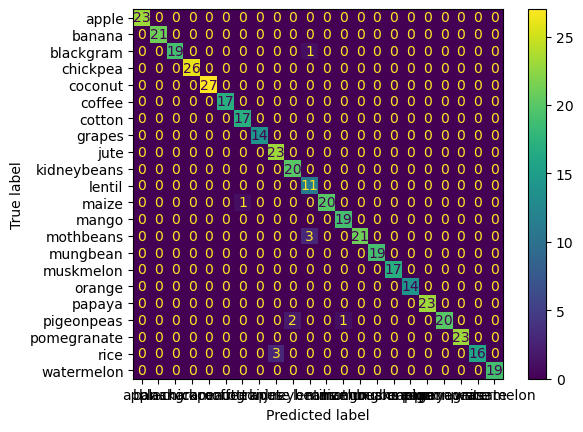

In [34]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid={
    "kn_class__n_neighbors": range(2, 15),
    "kn_class__weights": ['uniform', 'distance'],
    "kn_class__algorithm": ['ball_tree', 'kd_tree'],
    "kn_class__p": [1, 2],
}

knn_model = get_best_parameters(
    estimator=KNeighborsClassifier(),
    estimator_name='kn_class',
    param_grid=knn_param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.96      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.85      0.96      0.90        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

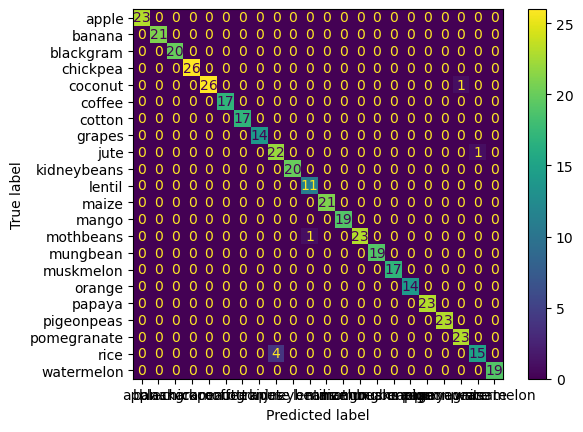

In [36]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dec_tree_param_grid={
    "dt_class__criterion": ['gini', 'entropy'],
    "dt_class__splitter": ['best', 'random'],
    "dt_class__max_depth": range(1, 10),
    "dt_class__min_samples_split": range(2, 10),
    "dt_class__min_samples_leaf": range(1, 10),
    "dt_class__random_state": [42],
}

dt_model = get_best_parameters(
    estimator=DecisionTreeClassifier(),
    estimator_name='dt_class',
    param_grid=dec_tree_param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

In [ ]:
dump(dt_model, 'decision_tree_model.pkl')

/home/hugo/anaconda3/envs/SnowFox/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/hugo/anaconda3/envs/SnowFox/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/hugo/anaconda3/envs/SnowFox/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/hugo/anaconda3/envs/SnowFox/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/hugo/anaconda3/envs/SnowFox/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/hugo/anaconda3/envs/SnowFox/lib/py

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.96      1.00      0.98        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.83      0.83      0.83        23
 kidneybeans       0.95      0.95      0.95        20
      lentil       0.92      1.00      0.96        11
       maize       0.95      0.95      0.95        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.95    

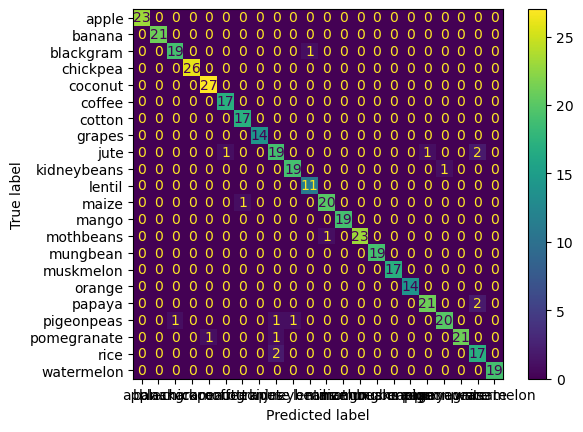

In [37]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg_param_grid={
    "lr_class__penalty": ['l1', 'l2'],
    "lr_class__C": np.logspace(-4, 4, 20),
    "lr_class__solver": ['liblinear'],
    "lr_class__random_state": [42],
}

lr_model = get_best_parameters(
    estimator=LogisticRegression(),
    estimator_name='lr_class',
    param_grid=log_reg_param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

/home/hugo/anaconda3/envs/SnowFox/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hugo/anaconda3/envs/SnowFox/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hugo/anaconda3/envs/SnowFox/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.68      0.95      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.74      0.85        27
      coffee       0.91      0.59      0.71        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.52      0.96      0.68        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.45      0.62        11
       maize       0.78      1.00      0.88        21
       mango       0.76      1.00      0.86        19
   mothbeans       0.71      0.62      0.67        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

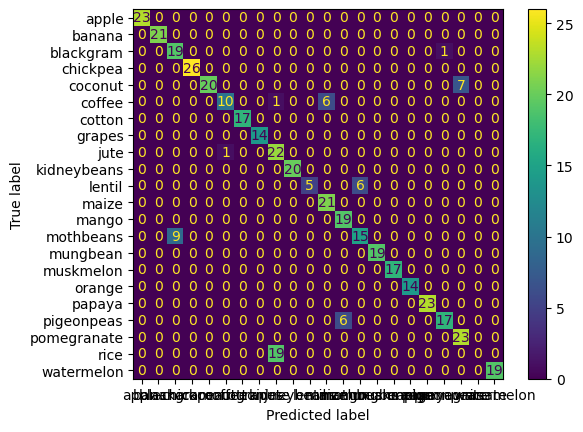

In [38]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada_boost_param_grid={
    "ada_class__n_estimators": [50, 100, 200],
    "ada_class__learning_rate": [0.1, 0.5, 1],
    "ada_class__random_state": [42],
}

ada_model = get_best_parameters(
    estimator=AdaBoostClassifier(),
    estimator_name='ada_class',
    param_grid=ada_boost_param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

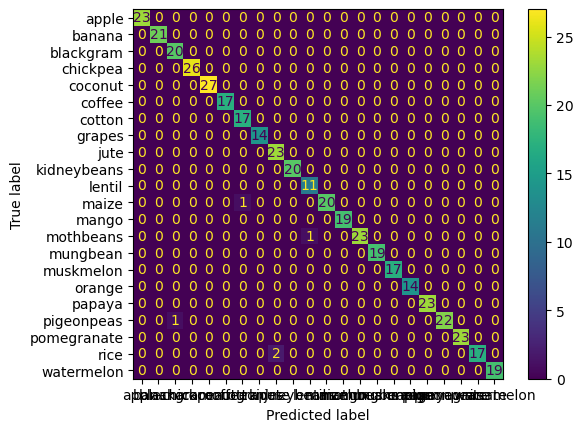

In [41]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_param_grid={
    "grad_class__learning_rate": [0.1, 0.5, 1],
    "grad_class__n_estimators": [50, 100, 200],
    "grad_class__random_state": [42],
}

grad_model = get_best_parameters(
    estimator=GradientBoostingClassifier(),
    estimator_name='grad_class',
    param_grid=grad_boost_param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

In [45]:
dump(grad_model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

In [42]:
# XGBoost7
from xgboost import XGBClassifier

xgb_param_grid={
    "xgb_class__learning_rate": [0.1, 0.5, 1],
    "xgb_class__n_estimators": [50, 100, 200],
    "xgb_class__random_state": [42],
}

xgb_model = get_best_parameters(
    estimator=XGBClassifier(),
    estimator_name='xgb_class',
    param_grid=xgb_param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

ValueError: 
All the 90 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/home/hugo/anaconda3/envs/SnowFox/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hugo/anaconda3/envs/SnowFox/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/hugo/anaconda3/envs/SnowFox/lib/python3.10/site-packages/sklearn/pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/hugo/anaconda3/envs/SnowFox/lib/python3.10/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/home/hugo/anaconda3/envs/SnowFox/lib/python3.10/site-packages/xgboost/sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21], got ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']
